In [30]:
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from keras import layers, models
from keras.utils import to_categorical
from sklearn.preprocessing import PolynomialFeatures

In [80]:
mat=sio.loadmat('..\DataSet\Dati_VEGA.mat')
ds=pd.DataFrame(mat['DATI_AVIO_VEGA'])
ds.rename(columns={0:'Velocità',1:'Angolo',2:'X Sensore',3:'Frequenza',4:'Pressione'},inplace=True)
ds['X Sensore']=ds['X Sensore'].astype(int)
ds.head(len(ds))

,Velocità,Angolo,X Sensore,Frequenza,Pressione
0,0.83,0.0,884,8.705373,136.214930
1,0.83,0.0,884,10.959415,137.277046
2,0.83,0.0,884,13.797086,136.765639
3,0.83,0.0,884,17.369503,136.208511
4,0.83,0.0,884,21.866908,133.538084
...,...,...,...,...,...
36703,0.98,6.0,3,17369.502567,145.463205
36704,0.98,6.0,3,21866.908172,143.944513
36705,0.98,6.0,3,27528.806375,142.171114
36706,0.98,6.0,3,34656.713902,139.664204


In [2]:
sensori=pd.read_csv('../DataSet/SensoriInfo.csv',sep=';')
sensori=sensori.replace('\u200b','',regex=True)
sensori.head(len(sensori))

,​,Fairing Ogive​,Unnamed: 2,Unnamed: 3,Fairing cylinder​,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Flare​,Unnamed: 27,Unnamed: 28,Unnamed: 29,I Stage​,Unnamed: 31,Unnamed: 32
0,Location,1,2,2,3,3,3,4,4,4,...,9,10,10,11,11,11,12,13,13,14
1,Layout,1,2,2,5,5,5,4,4,4,...,2,2,2,5,5,5,1,3,3,1
2,N. Sensor,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
3,X [mm],943,884,881,878,875,875,844,841,841,...,562,383,380,377,374,374,310,307,307,3
4,S[mm],0,0,0,0,0,-3,0,0,-3,...,0,0,0,0,0,-3,0,0,-3,0


In [27]:
sensori_ruotati=sensori.transpose()
sensori_ruotati.reset_index(inplace=True,drop=True)
# Se hai già letto il file CSV in un DataFrame
sensori_ruotati = sensori_ruotati.rename(columns=sensori_ruotati.iloc[0]).drop(sensori_ruotati.index[0])
sensori_ruotati.to_csv('../DataSet/SensoriInfoRuotati.csv',index=False)


In [28]:
sensori_ruotati.head(len(sensori_ruotati))

,Location,Layout,N. Sensor,X [mm],S[mm]
1,1,1,1,943,0
2,2,2,2,884,0
3,2,2,3,881,0
4,3,5,4,878,0
5,3,5,5,875,0
6,3,5,6,875,-3
7,4,4,7,844,0
8,4,4,8,841,0
9,4,4,9,841,-3
10,4,4,10,841,-6


In [29]:
print(sensori_ruotati['Location'])

1      1
2      2
3      2
4      3
5      3
6      3
7      4
8      4
9      4
10     4
11     4
12     4
13     4
14     5
15     6
16     6
17     7
18     7
19     7
20     8
21     8
22     9
23     9
24    10
25    10
26    11
27    11
28    11
29    12
30    13
31    13
32    14
Name: Location, dtype: object


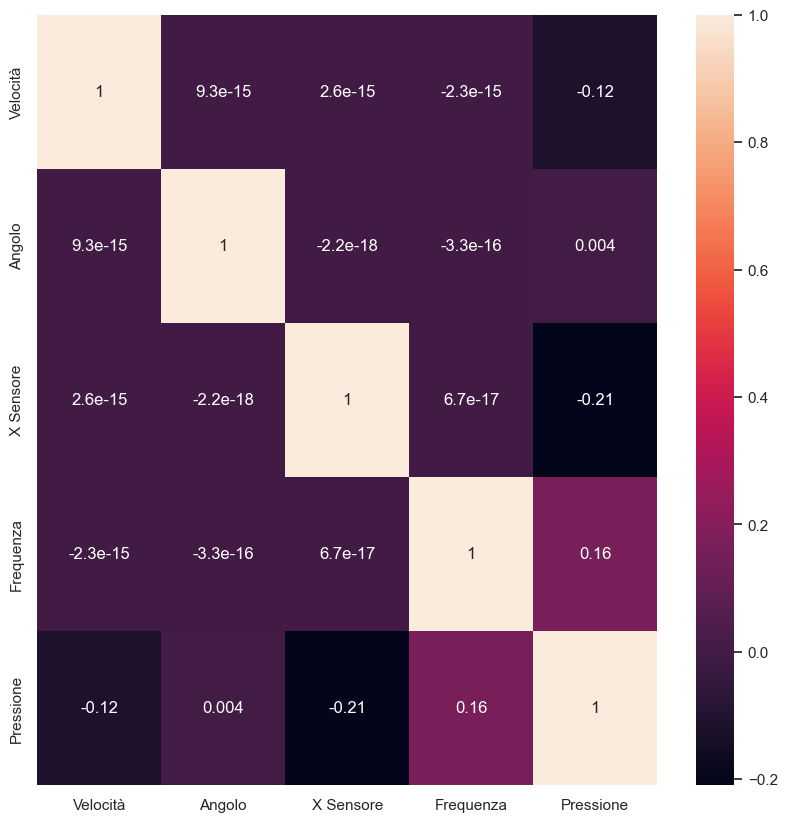

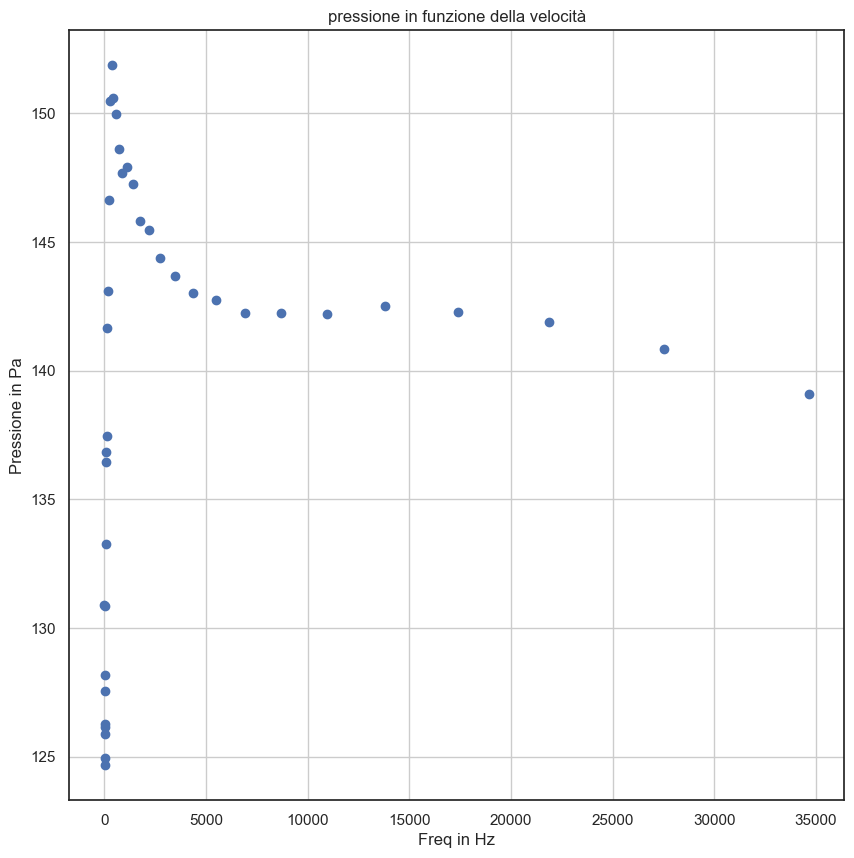

In [82]:
filtro=(ds['X Sensore'].isin([797])) & (ds['Velocità']==0.83) & (ds['Angolo']==0.0)
datiFiltered=ds[filtro]
plt.figure(figsize=(10,10))
sns.heatmap(ds.corr(),annot=True)
plt.figure(figsize=(10,10))
plt.scatter(datiFiltered['Frequenza'],datiFiltered['Pressione'])
plt.title('pressione in funzione della velocità')
plt.xlabel('Freq in Hz')
plt.ylabel('Pressione in Pa')
plt.grid(True)  # Aggiunge la griglia al grafico
plt.show()

In [83]:
#Creazione del dizionario con le posizioni dei sensori
posizione_sensori=sensori.iloc[3].to_list()
posizione_sensori.pop(0)
for i in range(len(posizione_sensori)):
    posizione_sensori[i]=int(posizione_sensori[i])
Location=sensori.iloc[0].to_list()
Location.pop(0)
for i in range(len(Location)):
    Location[i]=int(Location[i])
dict_sensori=dict(zip(posizione_sensori,Location))
print(dict_sensori)

{943: 1, 884: 2, 881: 2, 878: 3, 875: 3, 844: 4, 841: 4, 838: 4, 832: 4, 823: 4, 805: 5, 800: 6, 797: 6, 750: 7, 747: 7, 741: 8, 738: 8, 565: 9, 562: 9, 383: 10, 380: 10, 377: 11, 374: 11, 310: 12, 307: 13, 3: 14}


,Velocità,Angolo,X Sensore,Frequenza,Pressione
342,0.83,0.0,805,8.705373,125.504117
343,0.83,0.0,805,10.959415,126.605506
344,0.83,0.0,805,13.797086,128.012901
345,0.83,0.0,805,17.369503,128.998753
346,0.83,0.0,805,21.866908,129.242553
...,...,...,...,...,...
36209,0.98,6.0,805,17369.502567,145.089094
36210,0.98,6.0,805,21866.908172,144.336188
36211,0.98,6.0,805,27528.806375,143.274762
36212,0.98,6.0,805,34656.713902,141.460842


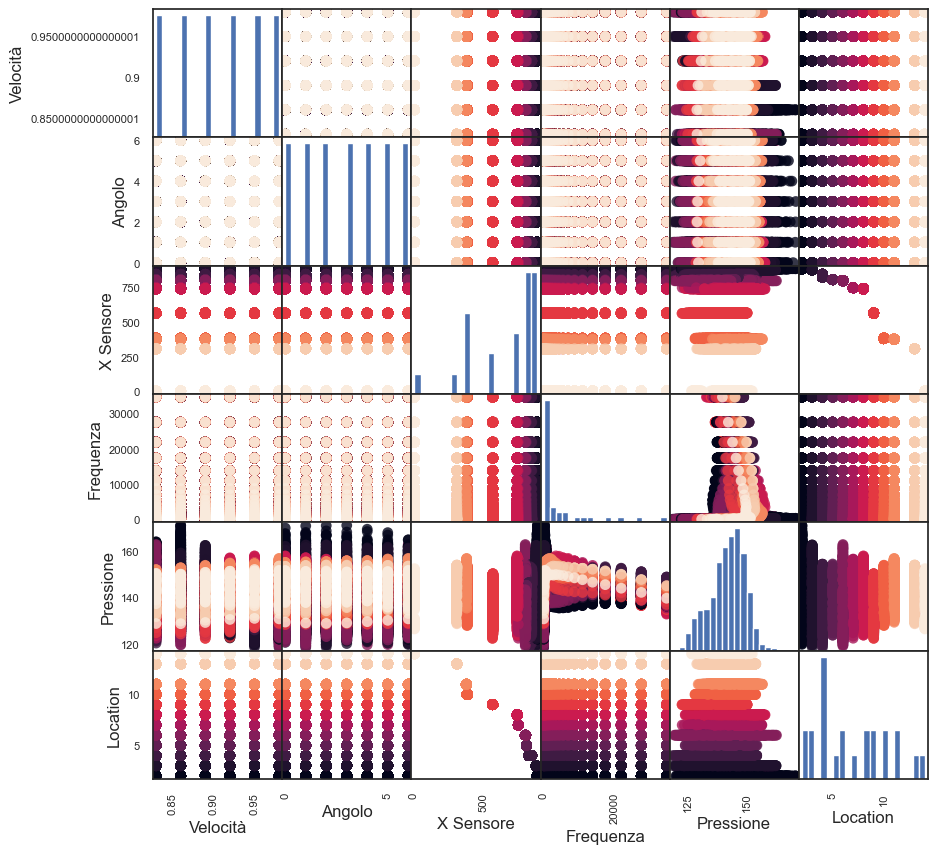

In [84]:
ds['Location']=ds['X Sensore'].map(dict_sensori)
ds.head(len(ds))
ds_per_loc={}
pd.plotting.scatter_matrix(ds,figsize=(10,10),c=ds['Location'],marker='o',hist_kwds={'bins':20},s=60,alpha=0.8)
for Location, data_Location in ds.groupby('Location'):
    data_Location.drop(columns='Location',inplace=True)
    ds_per_loc[Location]=data_Location
n=5
Keys=ds_per_loc.keys()
ds_per_loc[n].head(len(ds_per_loc[n]))

          Velocità       Angolo    X Sensore     Frequenza    Pressione
count  3192.000000  3192.000000  3192.000000   3192.000000  3192.000000
mean      0.905000     3.000000   882.500000   4433.456454   139.480177
std       0.051243     2.000313     1.500235   8124.815262     9.157860
min       0.830000     0.000000   881.000000      0.000000   119.968264
25%       0.860000     1.000000   881.000000     54.927190   134.427583
50%       0.905000     3.000000   882.500000    492.787039   138.216571
75%       0.950000     5.000000   884.000000   4363.021782   143.503330
max       0.980000     6.000000   884.000000  34656.713902   170.762698
          Velocità       Angolo    X Sensore     Frequenza    Pressione
count  3192.000000  3192.000000  3192.000000   3192.000000  3192.000000
mean      0.905000     3.000000   876.500000   4433.456454   140.361000
std       0.051243     2.000313     1.500235   8124.815262     8.927011
min       0.830000     0.000000   875.000000      0.000000   118

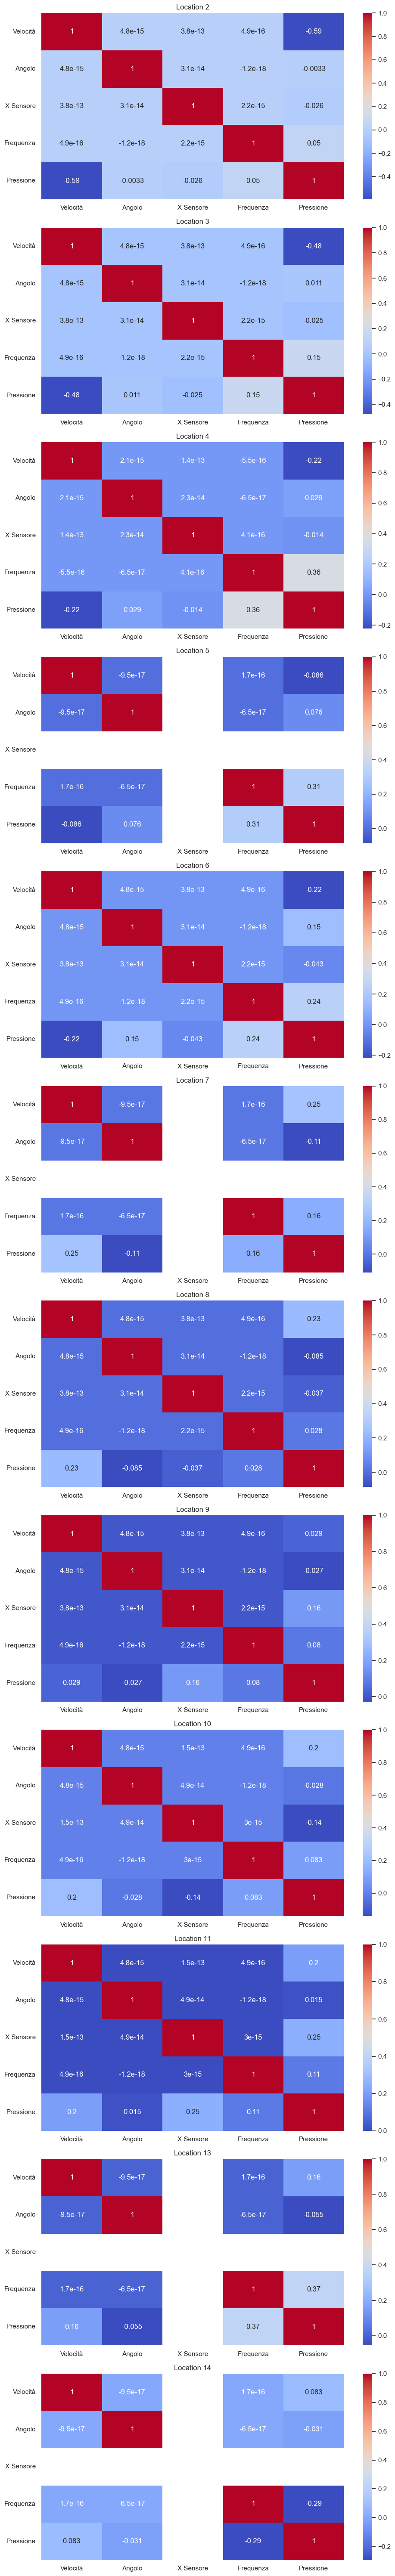

In [85]:
descrizioni={}
for k in Keys:
    descrizioni[k]=ds_per_loc[k].describe()
    print(descrizioni[k])

sns.set_theme(style='white')
fig,ax=plt.subplots(nrows=len(ds_per_loc),ncols=1,figsize=(10,5*len(ds_per_loc)))
i=0
for k in Keys:
    correlatioMatrix=ds_per_loc[k].corr()
    sns.heatmap(correlatioMatrix,annot=True,ax=ax[i],cmap='coolwarm')
    ax[i].set_title('Location '+str(k))
    i+=1
plt.tight_layout()
plt.show()

In [155]:
#sns.pairplot(ds)
#sns.pairplot(ds,x_vars=['Velocità','Angolo','X Sensore','Decibel'],y_vars=['Pressione'],kind='scatter')
# Creazione del grafico a dispersione
Input = ds.iloc[:, 0:3].values
output = ds.iloc[:, 3:5].values
print(Input)
#print(output)
#plt.figure(figsize=(8, 6))
#plt.scatter(all_features[:,:-1], all_features[:,-1], color='blue', label='Feature 5 vs. Feature 1')
#plt.scatter(features_1_to_4[:, 1], feature_5 * 4, color='red', label='Feature 5 vs. Feature 2')
#plt.scatter(features_1_to_4[:, 2], feature_5 * 4, color='green', label='Feature 5 vs. Feature 3')
#plt.scatter(features_1_to_4[:, 3], feature_5 * 4, color='orange', label='Feature 5 vs. Feature 4')
'''plt.xlabel('Features 1-4')
plt.ylabel('Feature 5')
plt.title('Relazione tra Feature 5 e Features 1-4')
plt.grid(True)
plt.legend()
plt.show()'''

[[8.30e-01 0.00e+00 8.84e+02]
 [8.30e-01 0.00e+00 8.84e+02]
 [8.30e-01 0.00e+00 8.84e+02]
 ...
 [9.80e-01 6.00e+00 3.00e+00]
 [9.80e-01 6.00e+00 3.00e+00]
 [9.80e-01 6.00e+00 3.00e+00]]


"plt.xlabel('Features 1-4')\nplt.ylabel('Feature 5')\nplt.title('Relazione tra Feature 5 e Features 1-4')\nplt.grid(True)\nplt.legend()\nplt.show()"

In [156]:
X_train, X_test, y_train, y_test = train_test_split(Input, output, test_size=0.2, random_state=64)
#scaler=StandardScaler()
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.transform(X_test)
#print(X_train.shape)

In [160]:
# Inizializza il modello di regressione lineare
#model = LinearRegression()
#model = RandomForestRegressor(n_estimators=100, random_state=64)
# Addestra il modello sui dati di addestramento
model=models.Sequential()
model.add(layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='linear'))
model.summary()
#compilazione del modello
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

epoche=100
numero_batch=16
#training
print(X_train.shape)
print(y_train.shape)
history=model.fit(X_train, y_train, epochs=epoche, batch_size=numero_batch)
# Esegui la previsione sui dati di test
y_pred = model.predict(X_test)

# Valuta le prestazioni del modello
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Model: "sequential_24"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 128)               512       
                                                                 
 dense_68 (Dense)            (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_69 (Dense)            (None, 2)                 258       
                                                                 
Total params: 17282 (67.51 KB)
Trainable params: 17282 (67.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
(29366, 3)
(29366, 2)
Epoch 1/100
1836/1836 [==============================] - 6s 3ms/step - loss: 34293080.0000 - mean_absolute_error: 2749.8057
Epoch 2/100
1836/1836 [==============================] - 5s 3ms/step - loss: 34081876.0000 -

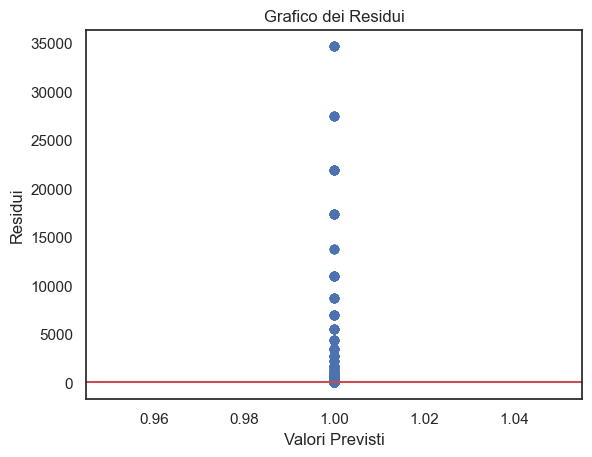

In [89]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Valori Previsti')
plt.ylabel('Residui')
plt.title('Grafico dei Residui')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

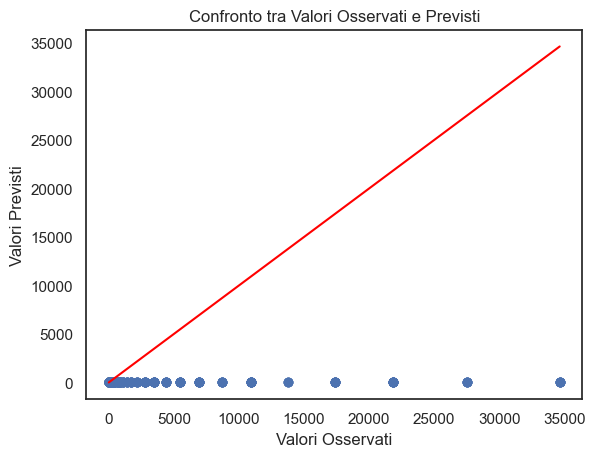

In [90]:
plt.scatter(y_test, y_pred)
plt.xlabel('Valori Osservati')
plt.ylabel('Valori Previsti')
plt.title('Confronto tra Valori Osservati e Previsti')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

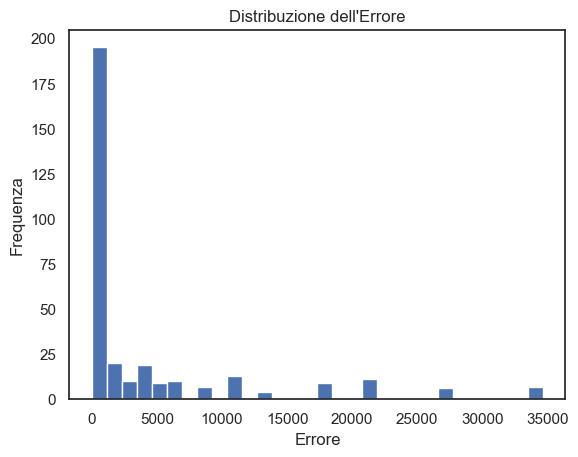

In [91]:
errors = y_test - y_pred
plt.hist(errors, bins=30)
plt.xlabel('Errore')
plt.ylabel('Frequenza')
plt.title('Distribuzione dell\'Errore')
plt.show()

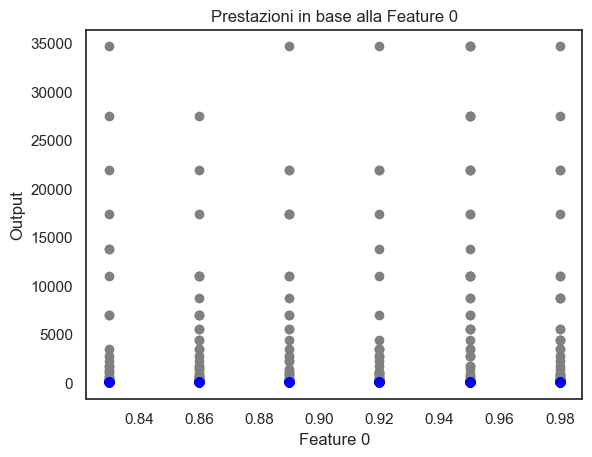

In [92]:
for i in range(X_test.shape[1]):
    plt.scatter(X_test[:, i], y_test, color='gray')
    plt.scatter(X_test[:, i], y_pred, color='blue')
    plt.xlabel('Feature {}'.format(i))
    plt.ylabel('Output')
    plt.title('Prestazioni in base alla Feature {}'.format(i))
    plt.show()

In [99]:
ds.head(len(ds))

,Velocità,Angolo,X Sensore,Frequenza,Pressione,Location
0,0.83,0.0,884,8.705373,136.214930,2
1,0.83,0.0,884,10.959415,137.277046,2
2,0.83,0.0,884,13.797086,136.765639,2
3,0.83,0.0,884,17.369503,136.208511,2
4,0.83,0.0,884,21.866908,133.538084,2
...,...,...,...,...,...,...
36703,0.98,6.0,3,17369.502567,145.463205,14
36704,0.98,6.0,3,21866.908172,143.944513,14
36705,0.98,6.0,3,27528.806375,142.171114,14
36706,0.98,6.0,3,34656.713902,139.664204,14


In [150]:
velocita=ds['Velocità'].unique()
print(velocita)
angolo=ds['Angolo'].unique()
print(angolo)
location=ds['X Sensore'].unique()
print(location)
AutoGradi=[]
i=0
while True:
    modelli=[]
    mses=[]
    grado=i
    for v in velocita:
        for a in angolo:
            for l in location:
                filtro = (ds['Velocità'] == v) & (ds['Angolo'] == a) & (ds['X Sensore'] == l)
                ds_fissati = ds[filtro]
                inp=ds_fissati.iloc[:,0:3]
                out=ds_fissati.iloc[:,3:5]
                X_test, X_train, y_test, y_train = train_test_split(inp, out, test_size=0.2, random_state=64)
                poly = PolynomialFeatures(degree=grado)
                X_train_poly = poly.fit_transform(X_train)
                X_test_poly = poly.transform(X_test)
                # Addestramento del modello
                modello = LinearRegression()
                modello.fit(X_train_poly, y_train)
                # Aggiunta del modello alla lista dei modelli addestrati
                # Valutazione delle prestazioni del modello
                #X_test_fissati = X_test.loc[filtro]
                #y_test_fissati = y_test.loc[filtro]
                y_pred = modello.predict(X_test_poly)
                mse = mean_squared_error(y_test, y_pred)
                mses.append(mse)
                modelli.append((v, a, l, modello, y_test, y_pred, mse))
                print("Mean Squared Error:", mse)
    if i==0 or np.mean(mses) <= np.mean(AutoGradi[i-1][1]):
        i+=1
        AutoGradi.append((modelli,mses,i))
    else:
        print('Grado migliore: ',i)
        break
print(len(modelli))

            

[0.83 0.86 0.89 0.92 0.95 0.98]
[0. 1. 2. 3. 4. 5. 6.]
[884 881 878 875 844 841 838 832 823 805 800 797 747 741 738 565 562 383
 380 377 374 307   3]
Mean Squared Error: 9931194.119308911
Mean Squared Error: 9931200.600628234
Mean Squared Error: 9931196.033559298
Mean Squared Error: 9931193.90385549
Mean Squared Error: 9931184.20746219
Mean Squared Error: 9931182.81241827
Mean Squared Error: 9931185.59426653
Mean Squared Error: 9931183.080705525
Mean Squared Error: 9931179.781325854
Mean Squared Error: 9931174.848226707
Mean Squared Error: 9931180.470798831
Mean Squared Error: 9931178.737979088
Mean Squared Error: 9931172.95412214
Mean Squared Error: 9931170.482575089
Mean Squared Error: 9931169.126647506
Mean Squared Error: 9931175.040735126
Mean Squared Error: 9931174.81878884
Mean Squared Error: 9931159.92489102
Mean Squared Error: 9931158.065264694
Mean Squared Error: 9931159.98673378
Mean Squared Error: 9931159.335169755
Mean Squared Error: 9931169.412208602
Mean Squared Error: 99

KeyboardInterrupt: 

In [144]:
m=AutoGradi[9][0][5]
print(m)
test,pred=m[4],m[5]

(0.83, 0.0, 841, LinearRegression(),         Frequenza   Pressione
222  13797.086312  146.268024
193     17.369503  129.515574
223  17369.502567  145.486030
220   8705.372941  146.658920
217   4363.021782  145.989807
201    109.594152  138.624286
214   2186.690817  146.612313
212   1379.708631  148.193432
216   3465.671390  146.020990
213   1736.950257  147.271825
195     27.528806  129.396443
224  21866.908172  144.148278
190      8.705373  125.063334
204    218.669082  148.067864
202    137.970863  142.662695
226  34656.713902  140.831810
205    275.288064  152.177642
210    870.537294  149.933568
196     34.656714  129.973340
225  27528.806375  142.632804
227      0.000000  132.677757
207    436.302178  151.793639
206    346.567139  153.007184
192     13.797086  128.449579
198     54.927190  135.540778
219   6914.923521  146.439805
200     87.053729  138.071292
221  10959.415215  146.680100
211   1095.941521  149.030897
194     21.866908  128.867816, array([[1222.97472205,  142.0977

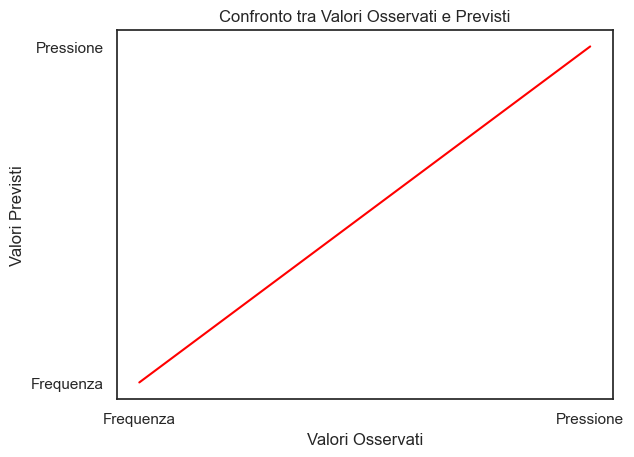

In [145]:

plt.scatter(test, pred)
plt.xlabel('Valori Osservati')
plt.ylabel('Valori Previsti')
plt.title('Confronto tra Valori Osservati e Previsti')
plt.plot([min(test), max(test)], [min(test), max(test)], color='red')
plt.show()